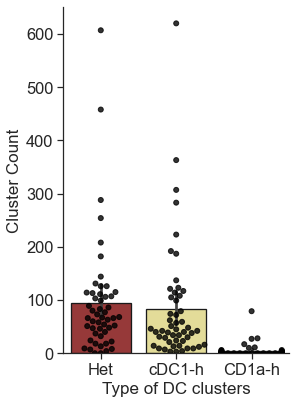

In [26]:
# Count # of clusters in Pts
df_Cluster_pv2 = pd.read_csv("C:/Data/DCs_results/c_Type.txt")
cluster_ct = df_Cluster_pv2.pivot_table(index=["Pt"], values=["Cluster"],columns = ["c_Type"], 
aggfunc=lambda x: len(x))
cluster_ct.reset_index(inplace = True)
cluster_ct_all = pd.melt(cluster_ct, id_vars=[(     'Pt',       '')], value_vars = [('Cluster',    'Het'), ('Cluster', 'cDC1-h'),
('Cluster', 'CD1a-h')])
cluster_ct_all_1 = cluster_ct_all.rename(columns={"value":"No. clusters"})
cluster_ct_all_2 = cluster_ct_all_1[cluster_ct_all_1.columns.dropna()].fillna(0)
# remove control samples
cluster_ct_Pts = cluster_ct_all_2[~cluster_ct_all_2[('Pt', '')].isin(["Norm LN1x4","Norm LN2x4","Norm LN3x4","Norm LN4x4"])]
cluster_ct_Pts.to_csv("C:/Data/DCs_results/c_Type_numbers_Pts.txt")

# Plot and save
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
g = sns.catplot(y='No. clusters', x='c_Type', data=cluster_ct_Pts, kind = "swarm", marker='o', alpha=0.8,color="black", 
                height = 6, aspect = .75, linewidth = 1)
sns.barplot(y='No. clusters', x='c_Type', data=cluster_ct_Pts, alpha=1,edgecolor="0.1", linewidth=1.3,ax = g.ax, 
            palette={"Het": "brown", "cDC1-h": "khaki", "CD1a-h": "black"})
plt.xlabel('Type of DC clusters', fontsize=17)
plt.ylabel('Cluster Count', fontsize=17)
g.savefig('C:/Data/DCs_results/fig1_count.tiff', format='tiff', dpi=600)
plt.show()